In [1]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'
def getN(vec,parity):
    finalCoords = {}
    xCoord =  vec[0]
    yCoord =  vec[1]
    squareLength = xCoord[1]-xCoord[0]
    defaultDistance = 1/3
    mainPoint = squareLength*defaultDistance*(1/2)
    if (parity%2==0):
        finalCoords['1'] = [[mainPoint+xCoord[0], mainPoint+xCoord[0]], [mainPoint+yCoord[0], 5*mainPoint+yCoord[0]]]
        finalCoords['2'] = [[mainPoint+xCoord[0],3*mainPoint+xCoord[0]], [5*mainPoint+yCoord[0], 5*mainPoint+yCoord[0]]]
        finalCoords['3'] = [[3*mainPoint+xCoord[0],3*mainPoint+xCoord[0]], [5*mainPoint+yCoord[0], mainPoint+yCoord[0]]]
        finalCoords['4'] = [[3*mainPoint+xCoord[0],5*mainPoint+xCoord[0]], [mainPoint+yCoord[0],mainPoint+yCoord[0]]]
        finalCoords['5'] = [[5*mainPoint+xCoord[0],5*mainPoint+xCoord[0]], [mainPoint+yCoord[0], 5*mainPoint+yCoord[0]]]
    else:
        finalCoords['5'] = [[mainPoint+xCoord[0], mainPoint+xCoord[0]], [mainPoint+yCoord[0], 5*mainPoint+yCoord[0]]]
        finalCoords['2'] = [[mainPoint+xCoord[0],3*mainPoint+xCoord[0]], [mainPoint+yCoord[0], mainPoint+yCoord[0]]]
        finalCoords['3'] = [[3*mainPoint+xCoord[0],3*mainPoint+xCoord[0]], [5*mainPoint+yCoord[0], mainPoint+yCoord[0]]]
        finalCoords['4'] = [[3*mainPoint+xCoord[0],5*mainPoint+xCoord[0]], [5*mainPoint+yCoord[0],5*mainPoint+yCoord[0]]]
        finalCoords['1'] = [[5*mainPoint+xCoord[0],5*mainPoint+xCoord[0]], [mainPoint+yCoord[0], 5*mainPoint+yCoord[0]]]
    return finalCoords
def GetJoinConnectionPoints(keyPoint):
    tempResult = []
    for j in range(keyPoint):
        for i in range(keyPoint):
            if ((i+1)%3==0) and i+1<keyPoint:
                h=i+(keyPoint)*j*2
                if h<keyPoint**2 and h>keyPoint:
                    tempResult.append([h,h+keyPoint])
    return tempResult
def getHorizontalPoints(keyPoint,cache):
    tempCache = []
    tempResult = []
    for subList in cache:
        for item in subList:
            tempCache.append(item)
    for i in range(keyPoint**2):
        if ((i+1)%3==0 or (i%3==0)) and (i>0 and i+1<keyPoint**2):
            if i not in tempCache:
                tempResult.append([i,i+keyPoint])
                tempCache.append(i)
                tempCache.append(i+keyPoint)
    return [tempResult,tempCache]
def getImage(iterationNumber,divisionColor):
    k=3**iterationNumber
    intervals = [[i/k, (i+1)/(k)] for i in range(0,k)]
    coordList=[]; count=0;
    for i in intervals:
        for j in intervals:
            coordList.append(getN([i,j],count))
            count+=1
    for item in coordList:
        for key in item: 
            plt.plot(item[key][0],item[key][1],'b')
    keyPoint = len(coordList)//k
    connectionPoints = GetJoinConnectionPoints(keyPoint)
    for pair in connectionPoints:
        for point in pair:
            if point%2==0:
                try:
                    plt.plot([coordList[point]['5'][0][1],coordList[point+1]['1'][0][1]],[coordList[point]['5'][1][1],coordList[point+1]['1'][1][1]],'b')
                except:
                    continue
            else:
                try:
                    plt.plot([coordList[point]['5'][0][1],coordList[point+1]['1'][0][1]],[coordList[point]['1'][1][1],coordList[point+1]['1'][1][1]],'b')
                except:
                    continue
    horizontalPoints = getHorizontalPoints(keyPoint,connectionPoints)
    for pair in horizontalPoints[0]:
        if pair[0]%2==0:
            try:
                plt.plot([coordList[pair[0]]['5'][0][1],coordList[pair[1]]['5'][0][1]],[coordList[pair[0]]['5'][1][1],coordList[pair[1]]['5'][1][1]],'b')
            except:
                continue
        else:
            try:
                plt.plot([coordList[pair[0]]['1'][0][0],coordList[pair[1]]['1'][0][0]],[coordList[pair[1]]['1'][1][0],coordList[pair[1]]['1'][1][0]],'b')
            except:
                    continue
    for point in range(0,len(coordList)):
        if point not in horizontalPoints[1]:
            if point%2==0:
                try:
                    plt.plot([coordList[point]['5'][0][1],coordList[point+1]['1'][0][0]],[coordList[point]['5'][1][1],coordList[point+1]['1'][1][0]],'b')
                except:
                    continue
            else:
                try:
                    plt.plot([coordList[point]['5'][0][1],coordList[point+1]['1'][0][0]],[coordList[point]['5'][1][1],coordList[point+1]['1'][1][0]],'b')
                except:
                    continue
        else:
            if not (point+1)%3==0:
                try:
                    plt.plot([coordList[point]['5'][0][1],coordList[point+1]['1'][0][0]],[coordList[point]['5'][1][1],coordList[point+1]['1'][1][0]],'b')
                except:
                    continue
    for i in range(0,k+1):
        plt.axhline(y=i/k, color=divisionColor, linestyle='-')
        plt.axvline(x=i/k, color=divisionColor, linestyle='-')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()

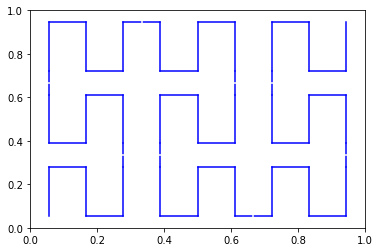

In [18]:
getImage(1,'w')